In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

pd = pd.read_excel("Q2各省基本数据.xlsx")
pd = pd.set_index("省份")

print(pd.info())

<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, 安徽 to 重庆
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   水平面总辐照量(kWh/m2)    31 non-null     float64
 1   峰值日照时数             31 non-null     float64
 2   每W首年发电量（kwh）       31 non-null     float64
 3   年有效利用小时数           31 non-null     float64
 4   人口密度（人/平方公里）       31 non-null     int64  
 5   高速公路网密度（公里/万平方千米）  31 non-null     float64
 6   装机容量（千千瓦）          31 non-null     float64
 7   2022年人均实际GDP（亿元）   31 non-null     float64
 8   未利用土地面积            31 non-null     float64
dtypes: float64(8), int64(1)
memory usage: 2.4+ KB
None


dict_keys(['自然资源和环境类', '经济和发展类', '能源潜力和利用类'])
dict_values([水平面总辐照量(kWh/m2)    0.003275
峰值日照时数             0.004457
未利用土地面积            0.363455
dtype: float64, 人口密度（人/平方公里）         0.192043
高速公路网密度（公里/万平方千米）    0.073703
2022年人均实际GDP（亿元）     0.026477
dtype: float64, 每W首年发电量（kwh）    0.019851
年有效利用小时数        0.020273
装机容量（千千瓦）       0.091313
dtype: float64])


C:\Users\21742\AppData\Local\Temp\ipykernel_25464\434540786.py:44: UserWarning: Glyph 27700 (\N{CJK UNIFIED IDEOGRAPH-6C34}) missing from current font.
  plt.tight_layout()
C:\Users\21742\AppData\Local\Temp\ipykernel_25464\434540786.py:44: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from current font.
  plt.tight_layout()
C:\Users\21742\AppData\Local\Temp\ipykernel_25464\434540786.py:44: UserWarning: Glyph 38754 (\N{CJK UNIFIED IDEOGRAPH-9762}) missing from current font.
  plt.tight_layout()
C:\Users\21742\AppData\Local\Temp\ipykernel_25464\434540786.py:44: UserWarning: Glyph 24635 (\N{CJK UNIFIED IDEOGRAPH-603B}) missing from current font.
  plt.tight_layout()
C:\Users\21742\AppData\Local\Temp\ipykernel_25464\434540786.py:44: UserWarning: Glyph 36752 (\N{CJK UNIFIED IDEOGRAPH-8F90}) missing from current font.
  plt.tight_layout()
C:\Users\21742\AppData\Local\Temp\ipykernel_25464\434540786.py:44: UserWarning: Glyph 29031 (\N{CJK UNIFIED IDEOGRAPH-7167}) missing fr

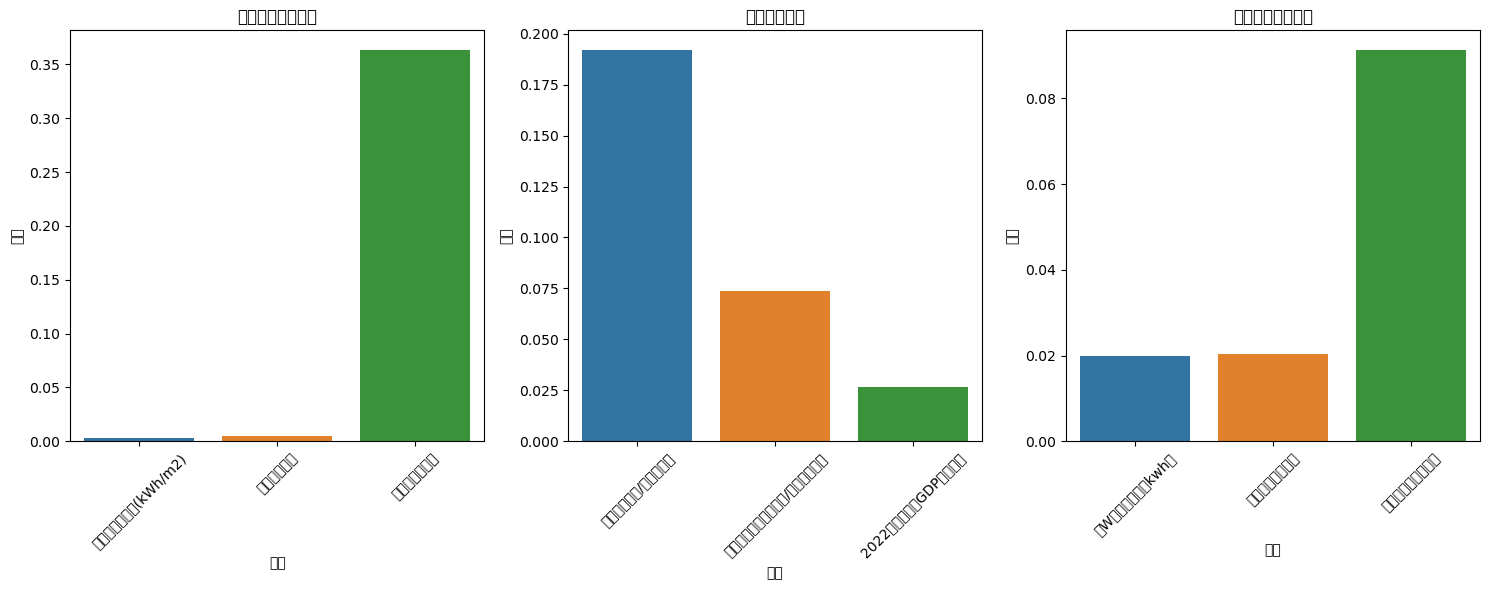

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 重新加载数据
df_entropy = pd.read_excel('Q2各省基本数据.xlsx')

# 定义熵权法函数
def entropy_weight(s):
    s = s.astype(float)
    # 计算概率分布
    p = s / s.sum()
    # 计算熵值
    E = -np.sum(p * np.log(p)) / np.log(len(s))
    # 计算差异系数
    g = 1 - E
    return g

# 根据新的分类，重新计算每个类别中指标的熵权法权重
categories = {
    "自然资源和环境类": ['水平面总辐照量(kWh/m2)', '峰值日照时数', '未利用土地面积'],
    "经济和发展类": ['人口密度（人/平方公里）', '高速公路网密度（公里/万平方千米）', '2022年人均实际GDP（亿元）'],
    "能源潜力和利用类": ['每W首年发电量（kwh）', '年有效利用小时数', '装机容量（千千瓦）']
}

# 计算每个类别的熵权法权重
weights_by_category = {category: df_entropy[columns].apply(entropy_weight, axis=0) for category, columns in categories.items()}
print(weights_by_category.keys())
print(weights_by_category.values())
# 可视化每个类别的权重
plt.figure(figsize=(15, 6))

for i, (category, weights) in enumerate(weights_by_category.items(), 1):
    # print(category)
    # print(weights)
    plt.subplot(1, 3, i)
    sns.barplot(x=weights.index, y=weights.values)
    plt.xticks(rotation=45)
    plt.title(category)
    plt.ylabel('权重')
    plt.xlabel('指标')

plt.tight_layout()
plt.show()

     省份  TOPSIS_Score
26   西藏      0.676964
27   新疆      0.670345
19   青海      0.558622
17  内蒙古      0.552738
3    甘肃      0.532041


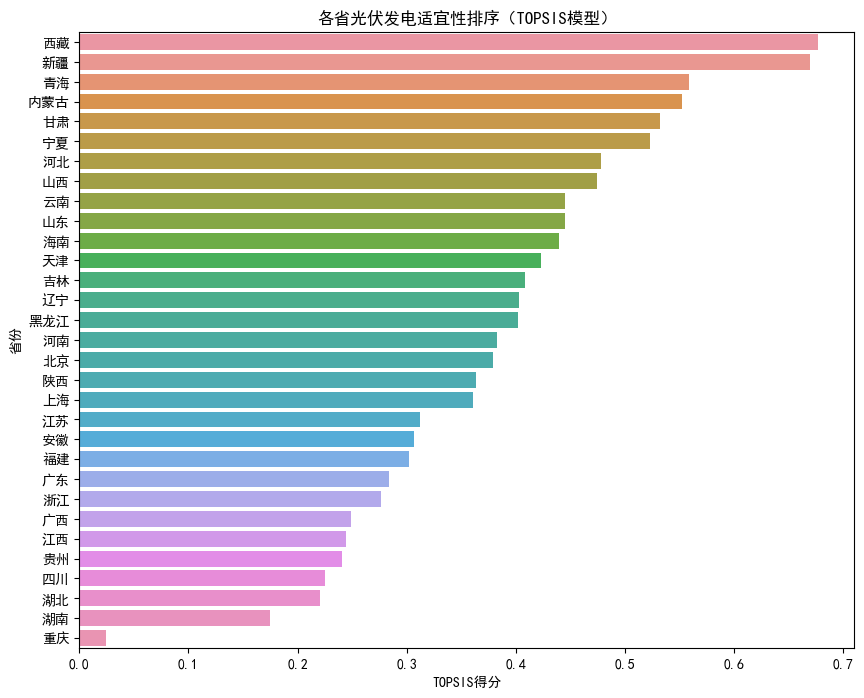

In [32]:
# 定义TOPSIS函数
def topsis(data, weights):
    # 归一化处理
    data_normalized = (data) / np.sqrt(((data)**2).sum())
    

    # 应用权重
    weighted_data = data_normalized * weights

    # 确定理想最优解和最劣解
    ideal_best = weighted_data.max()
    ideal_worst = weighted_data.min()

    # 计算距离
    distance_best = np.sqrt(((weighted_data - ideal_best)**2).sum(axis=1))
    distance_worst = np.sqrt(((weighted_data - ideal_worst)**2).sum(axis=1))

    # 计算相对接近度
    relative_closeness = distance_worst / (distance_best + distance_worst)
    return relative_closeness


import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
plt.rcParams ['font.sans-serif']=['simHei']
# # 加载数据
df_topsis = pd.read_excel("Q2各省基本数据.xlsx")


# 指定权重
weights = np.array([0.35, 0.45, 0.05, 0.02,0.02, 0.01, 0.025, 0.015, 0.05])

# 将所有相关列转换为数值类型
df_topsis[df_topsis.columns[1:]] = df_topsis[df_topsis.columns[1:]].apply(pd.to_numeric, errors='coerce')

# 应用TOPSIS模型
topsis_scores = topsis(df_topsis[df_topsis.columns[1:]], weights)

# 将TOPSIS评分添加到原始DataFrame
df_topsis['TOPSIS_Score'] = topsis_scores

# 根据TOPSIS评分对省份进行排序
sorted_provinces_topsis = df_topsis[['省份', 'TOPSIS_Score']].sort_values(by='TOPSIS_Score', ascending=False)

print(sorted_provinces_topsis.head())   # 显示排序的前几个省份以示例

# 可视化结果
plt.figure(figsize=(10, 8))
sns.barplot(x='TOPSIS_Score', y='省份', data=sorted_provinces_topsis)
plt.title('各省光伏发电适宜性排序（TOPSIS模型）')
plt.xlabel('TOPSIS得分')
plt.ylabel('省份')
plt.show()


c:\Users\21742\anaconda3\envs\jiangfintech\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 27700 (\N{CJK UNIFIED IDEOGRAPH-6C34}) missing from current font.
  fig.canvas.draw()
c:\Users\21742\anaconda3\envs\jiangfintech\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from current font.
  fig.canvas.draw()
c:\Users\21742\anaconda3\envs\jiangfintech\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 38754 (\N{CJK UNIFIED IDEOGRAPH-9762}) missing from current font.
  fig.canvas.draw()
c:\Users\21742\anaconda3\envs\jiangfintech\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 24635 (\N{CJK UNIFIED IDEOGRAPH-603B}) missing from current font.
  fig.canvas.draw()
c:\Users\21742\anaconda3\envs\jiangfintech\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 36752 (\N{CJK UNIFIED IDEOGRAPH-8F90}) missing from current font.
  fig.canvas.draw()
c:\Users\21742\anaconda3\envs\jiangfintech\lib\site-packages\seab

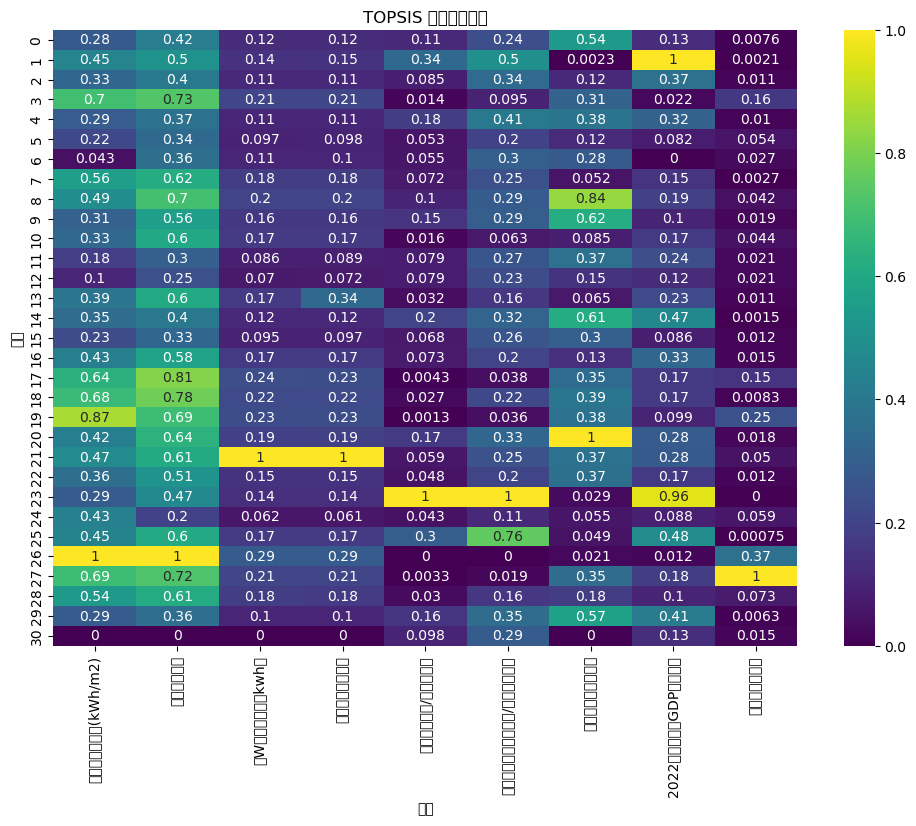

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 加载数据
file_path = 'Q2各省基本数据.xlsx'
df_judgment_matrix = pd.read_excel(file_path)

# 选取除了第一列（省份名称）以外的所有列来创建判断矩阵
judgment_matrix = df_judgment_matrix.iloc[:, 1:]

# 数据归一化
norm_judgment_matrix = (judgment_matrix - judgment_matrix.min()) / (judgment_matrix.max() - judgment_matrix.min())


# 使用Seaborn创建热图
plt.figure(figsize=(12, 8))
sns.heatmap(norm_judgment_matrix, annot=True, cmap='viridis')
plt.title('TOPSIS 判断矩阵热图')
plt.ylabel('省份')
plt.xlabel('指标')
plt.show()


c:\Users\21742\anaconda3\envs\jiangfintech\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 27700 (\N{CJK UNIFIED IDEOGRAPH-6C34}) missing from current font.
  fig.canvas.draw()
c:\Users\21742\anaconda3\envs\jiangfintech\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from current font.
  fig.canvas.draw()
c:\Users\21742\anaconda3\envs\jiangfintech\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 38754 (\N{CJK UNIFIED IDEOGRAPH-9762}) missing from current font.
  fig.canvas.draw()
c:\Users\21742\anaconda3\envs\jiangfintech\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 24635 (\N{CJK UNIFIED IDEOGRAPH-603B}) missing from current font.
  fig.canvas.draw()
c:\Users\21742\anaconda3\envs\jiangfintech\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 36752 (\N{CJK UNIFIED IDEOGRAPH-8F90}) missing from current font.
  fig.canvas.draw()
c:\Users\21742\anaconda3\envs\jiangfintech\lib\site-packages\seab

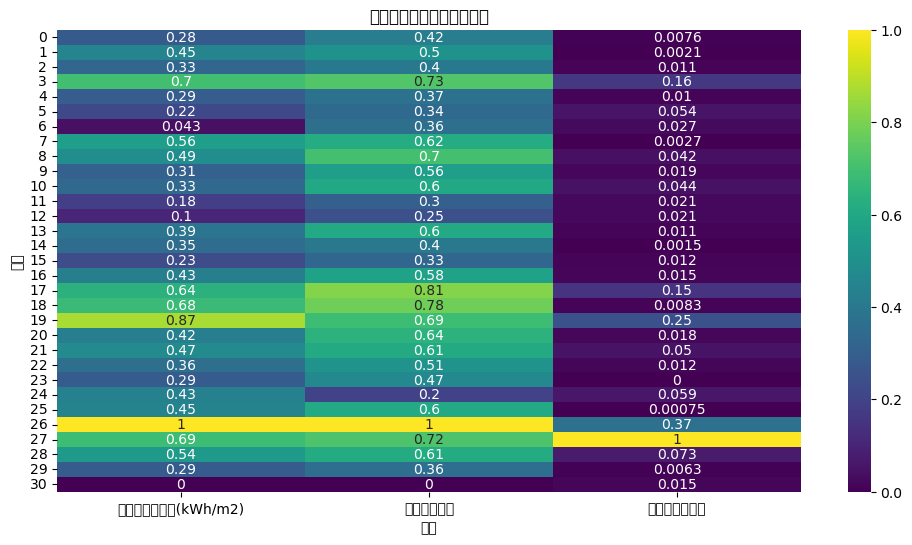

c:\Users\21742\anaconda3\envs\jiangfintech\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 20154 (\N{CJK UNIFIED IDEOGRAPH-4EBA}) missing from current font.
  fig.canvas.draw()
c:\Users\21742\anaconda3\envs\jiangfintech\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 21475 (\N{CJK UNIFIED IDEOGRAPH-53E3}) missing from current font.
  fig.canvas.draw()
c:\Users\21742\anaconda3\envs\jiangfintech\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 23494 (\N{CJK UNIFIED IDEOGRAPH-5BC6}) missing from current font.
  fig.canvas.draw()
c:\Users\21742\anaconda3\envs\jiangfintech\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  fig.canvas.draw()
c:\Users\21742\anaconda3\envs\jiangfintech\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from current font.
  fig.canvas.draw()
c:\Users\21742\anaconda3\envs\jiangfintech\lib\site-packages\seab

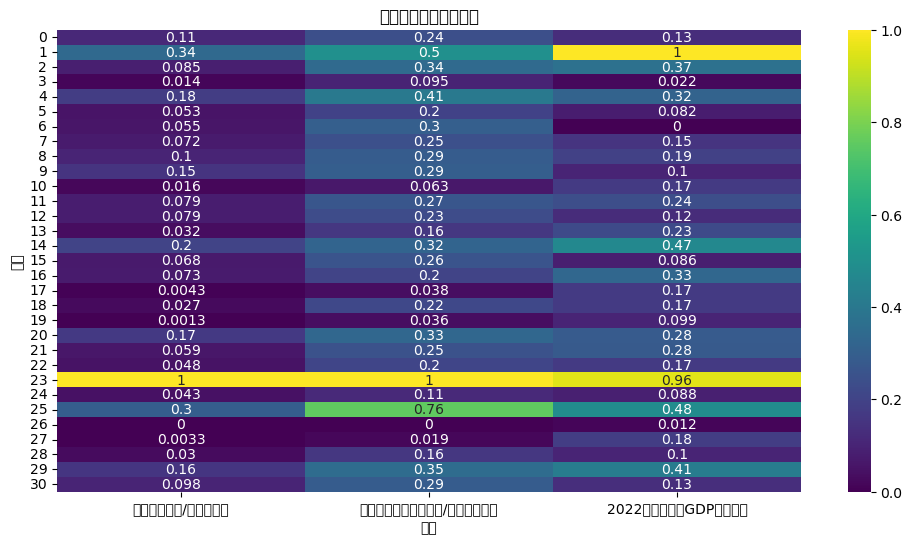

c:\Users\21742\anaconda3\envs\jiangfintech\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 27599 (\N{CJK UNIFIED IDEOGRAPH-6BCF}) missing from current font.
  fig.canvas.draw()
c:\Users\21742\anaconda3\envs\jiangfintech\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 39318 (\N{CJK UNIFIED IDEOGRAPH-9996}) missing from current font.
  fig.canvas.draw()
c:\Users\21742\anaconda3\envs\jiangfintech\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from current font.
  fig.canvas.draw()
c:\Users\21742\anaconda3\envs\jiangfintech\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 21457 (\N{CJK UNIFIED IDEOGRAPH-53D1}) missing from current font.
  fig.canvas.draw()
c:\Users\21742\anaconda3\envs\jiangfintech\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 30005 (\N{CJK UNIFIED IDEOGRAPH-7535}) missing from current font.
  fig.canvas.draw()
c:\Users\21742\anaconda3\envs\jiangfintech\lib\site-packages\seab

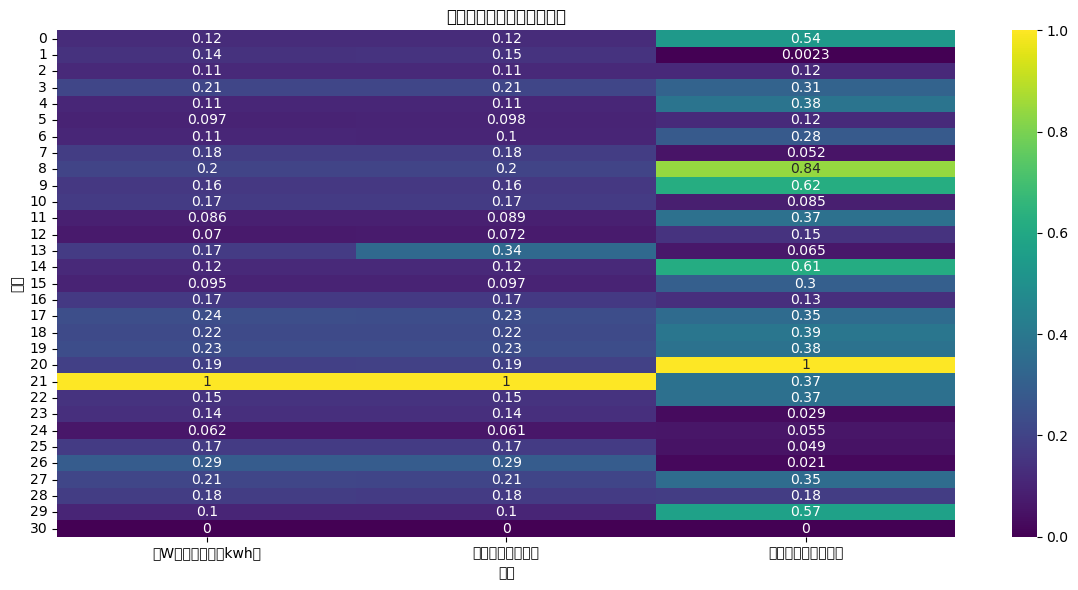

In [50]:
# 根据实际列名重新创建判断矩阵
norm_judgment_matrix_new=norm_judgment_matrix
# 自然资源和环境类判断矩阵
natural_resources_matrix = norm_judgment_matrix_new[['水平面总辐照量(kWh/m2)', '峰值日照时数', '未利用土地面积']]

# 经济和发展类判断矩阵
economy_development_matrix = norm_judgment_matrix_new[['人口密度（人/平方公里）', '高速公路网密度（公里/万平方千米）', '2022年人均实际GDP（亿元）']]

# 能源潜力和利用类判断矩阵
energy_potential_matrix = norm_judgment_matrix_new[['每W首年发电量（kwh）', '年有效利用小时数', '装机容量（千千瓦）']]

# 绘制热图
plt.figure(figsize=(12,6))
# 自然资源和环境类
sns.heatmap(natural_resources_matrix, annot=True, cmap='viridis')
plt.title('自然资源和环境类判断矩阵')
plt.ylabel('省份')
plt.xlabel('指标')
plt.show()

plt.figure(figsize=(12, 6))
# 经济和发展类
sns.heatmap(economy_development_matrix, annot=True, cmap='viridis')
plt.title('经济和发展类判断矩阵')
plt.ylabel('省份')
plt.xlabel('指标')
plt.show()

plt.figure(figsize=(12, 6))
# 能源潜力和利用类
sns.heatmap(energy_potential_matrix, annot=True, cmap='viridis')
plt.title('能源潜力和利用类判断矩阵')
plt.ylabel('省份')
plt.xlabel('指标')

plt.tight_layout()
plt.show()
